In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
credit = pd.read_excel("D:/pyproj/datasource/data/default of credit card clients.xls")
credit.head()



,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
trainx = ["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23"]
Target = ["Y"]
traindata_x,valdata_x,traindata_y,valdata_y=train_test_split(credit[trainx],credit[Target],test_size=0.25,random_state=1)
clf_l1_LR = LogisticRegression(penalty='l2')
clf_l1_LR.fit(traindata_x,traindata_y)
pre_y = clf_l1_LR.predict(valdata_x)
print(metrics.classification_report(valdata_y,pre_y))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5832
           1       0.00      0.00      0.00      1668

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.78      0.68      7500



D:\App\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\App\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\App\Anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter 

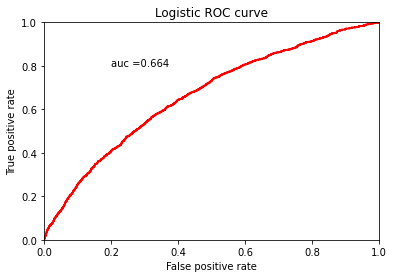

In [21]:
pre_y_p = clf_l1_LR.predict_proba(valdata_x)[:,1]
fpr_LR,tpr_LR,_ = metrics.roc_curve(valdata_y,pre_y_p)
auc = metrics.auc(fpr_LR,tpr_LR)
plt.figure()
plt.plot(fpr_LR,tpr_LR,"r",linewidth=2)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Logistic ROC curve')
plt.text(0.2,0.8,"auc ="+str(round(auc,4)))
plt.show()